# Estimating the number of chromosomes in A. castellanii

Assemblies for both A. castellanii strains contain a number of scaffolds greater than the number of chromosomes. This is because of a number of unplaced sequences. Here we try to give an accurate estimation of the number of chromosomes.

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import cooler

In [110]:
clr = cooler.Cooler('../../data/input/shared_assets/hic/C3.mcool::/resolutions/32000')

## C3 strain
There is a sharp drop in scaffold length before the 50th scaffold, after what there are a number of scaffolds of ~50kb.

<IPython.core.display.Javascript object>


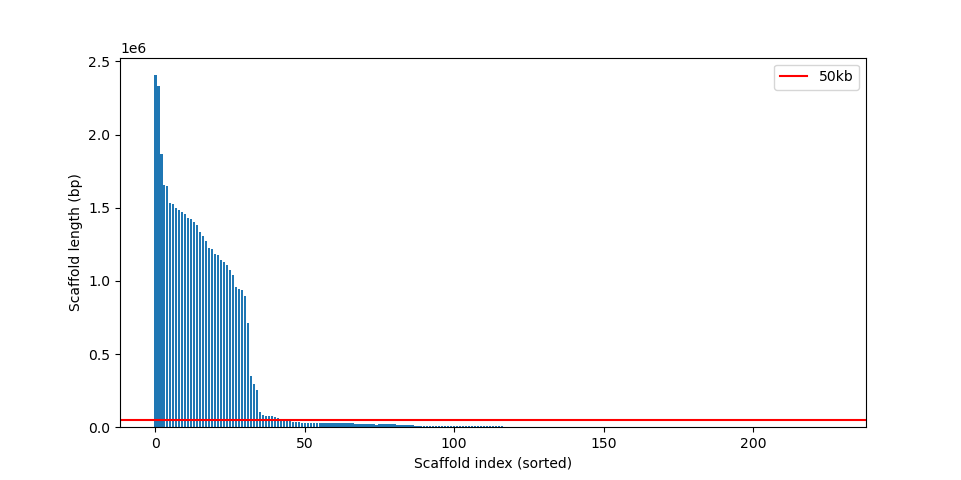

In [51]:
%matplotlib notebook
lens = clr.chroms()['length'][:]
plt.bar(range(len(lens)), lens)
plt.axhline(50000, c='r', label='50kb')
plt.xlabel("Scaffold index (sorted)")
plt.ylabel("Scaffold length (bp)")
plt.legend()

If we look at the whole genome Hi-C contact map from C3 including all 227 scaffolds, we can see the characteristic inter-telomeric contact pattern. This pattern is not visible for the small scaffolds which likely do not represent a chromosome.

<IPython.core.display.Javascript object>


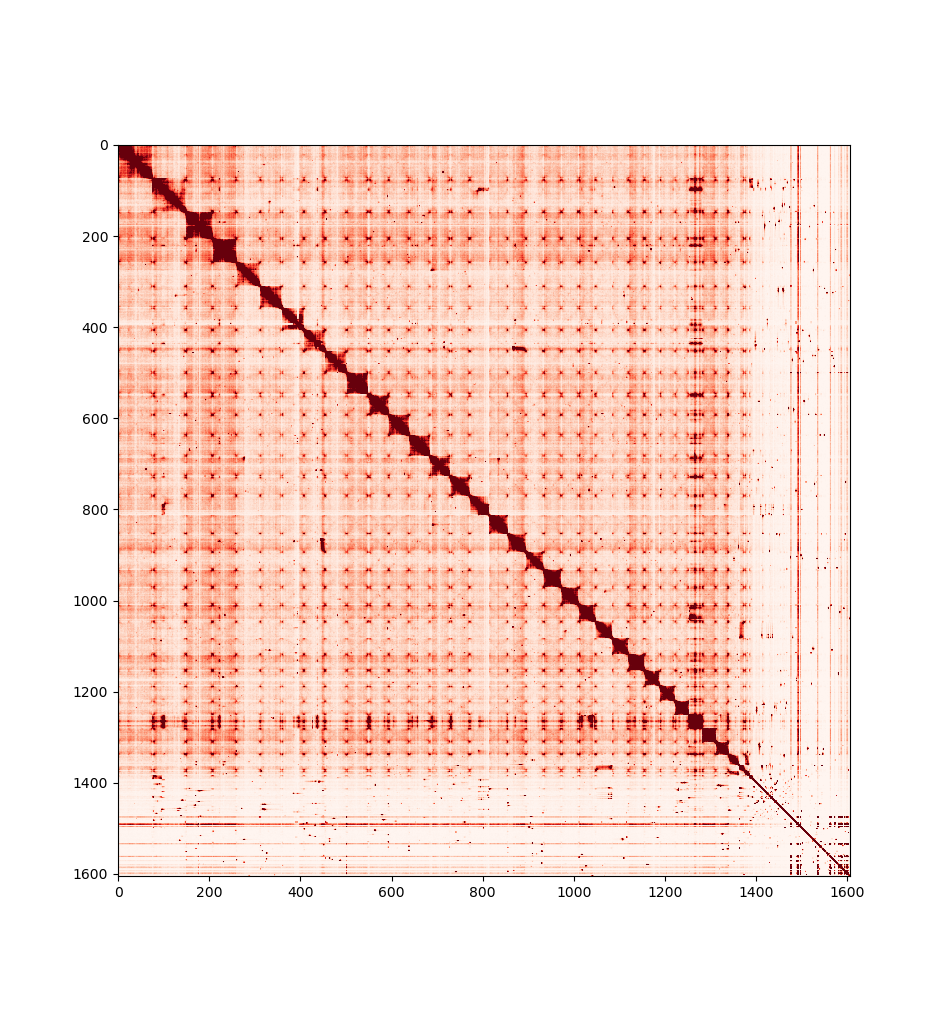

In [38]:
%matplotlib notebook
fullmat = clr.matrix(balance=False, sparse=False)[:]
plt.imshow(fullmat, cmap='Reds', vmax=100)

If we look more closely at the point where clustering start to disappear (between scaffold 30 and 50), we can see that the last scaffold with a clear inter-telomeric contact pattern is `scaffold_35`

<IPython.core.display.Javascript object>


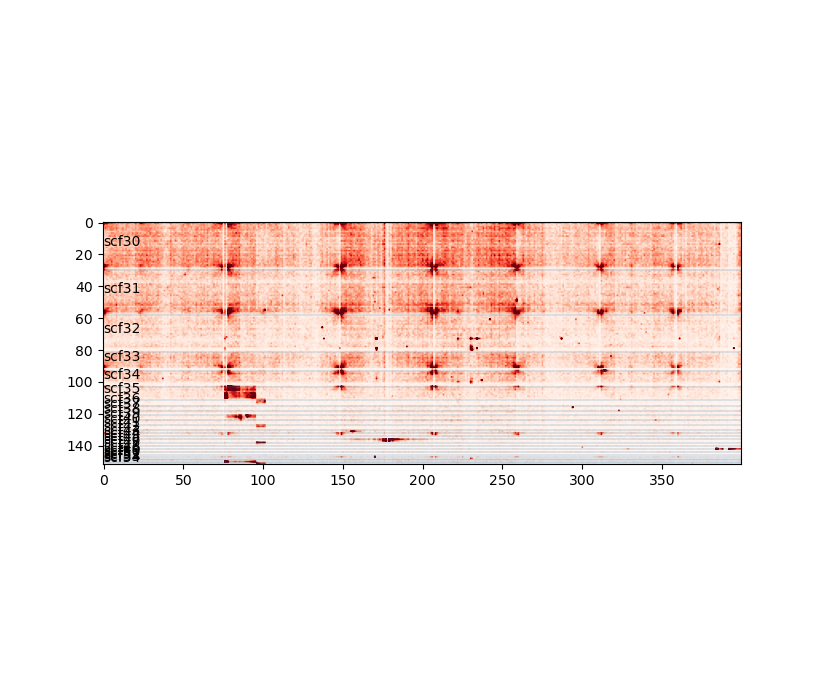

In [77]:
%matplotlib notebook
FIRST_SCF, LAST_SCF = 29, 55
starts = [clr.extent(chrom)[0] for chrom in clr.chroms()[FIRST_SCF:LAST_SCF]['name']]
text = clr.chroms()[FIRST_SCF:LAST_SCF]['name'].values
s, e = clr.extent(text[0])[0], clr.extent(text[-1])[1]
fullmat = clr.matrix(balance=False, sparse=False)[:][s:e, :400]
plt.imshow(fullmat, cmap='Reds', vmax=100)
for i, pos in enumerate(starts):
    plt.axhline(pos-s, lw=0.2)
    if i < (len(starts)-1):
        plt.text(0, ((pos + starts[i+1]) / 2)-s, 'scf'+ text[i].split('_')[1])

This happens to be exactly the point after which we observe the sharp drop in scaffold length.

<IPython.core.display.Javascript object>


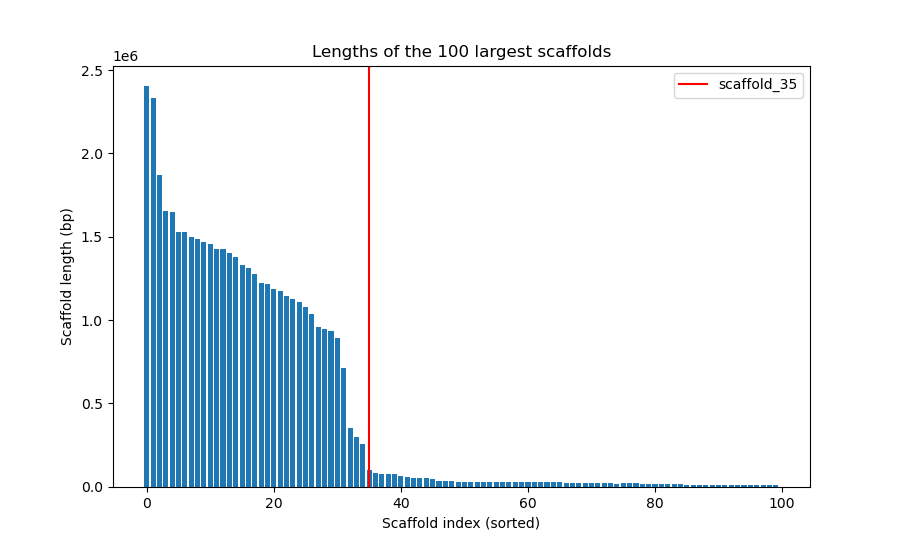

In [83]:
%matplotlib notebook
lens = clr.chroms()['length'][:100]
plt.bar(range(len(lens)), lens)
plt.axvline(35, c='r', label='scaffold_35')
plt.xlabel("Scaffold index (sorted)")
plt.ylabel("Scaffold length (bp)")
plt.title("Lengths of the 100 largest scaffolds")
plt.legend()

In [111]:
# Largest and smallest chromosome
print(
    f"C3: Largest={clr.chroms()['length'][0].values[0]/1000:.2f}kbp, "
    f"Smallest={clr.chroms()['length'][34].values[0]/1000:.2f}kbp"
)

C3: Largest=2405.92kbp, Smallest=253.98kbp


## Neff strain

Now we simply repeat the operation for the Neff strain. Again, there is a clear discontinuity in scaffold length around the ~30th scaffold.

In [112]:
clr = cooler.Cooler('../../data/input/shared_assets/hic/Neff.mcool::/resolutions/32000')

<IPython.core.display.Javascript object>


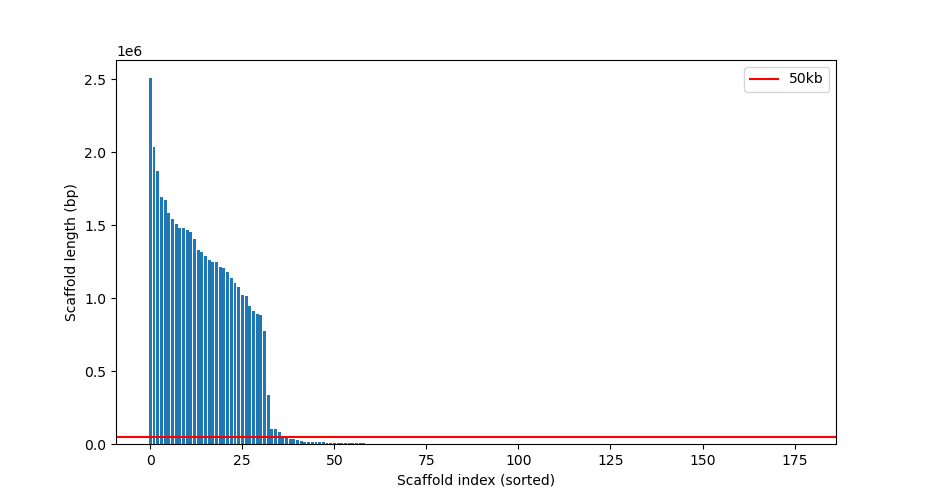

In [86]:
%matplotlib notebook
lens = clr.chroms()['length'][:]
plt.bar(range(len(lens)), lens)
plt.axhline(50000, c='r', label='50kb')
plt.xlabel("Scaffold index (sorted)")
plt.ylabel("Scaffold length (bp)")
plt.legend()

<IPython.core.display.Javascript object>


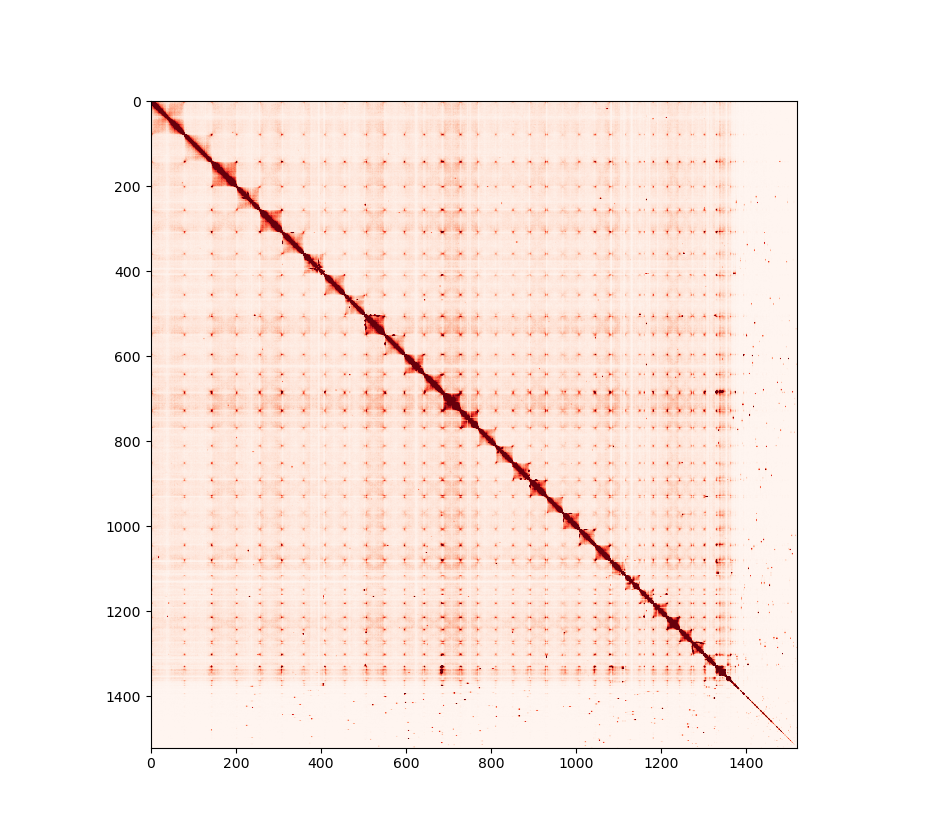

In [87]:
%matplotlib notebook
fullmat = clr.matrix(balance=False, sparse=False)[:]
plt.imshow(fullmat, cmap='Reds', vmax=100)

All scaffolds until `scaffold_36` (included) show a telomere-specific contact pattern. So there is most likely 35 or 36 chromosomes as well.

<IPython.core.display.Javascript object>


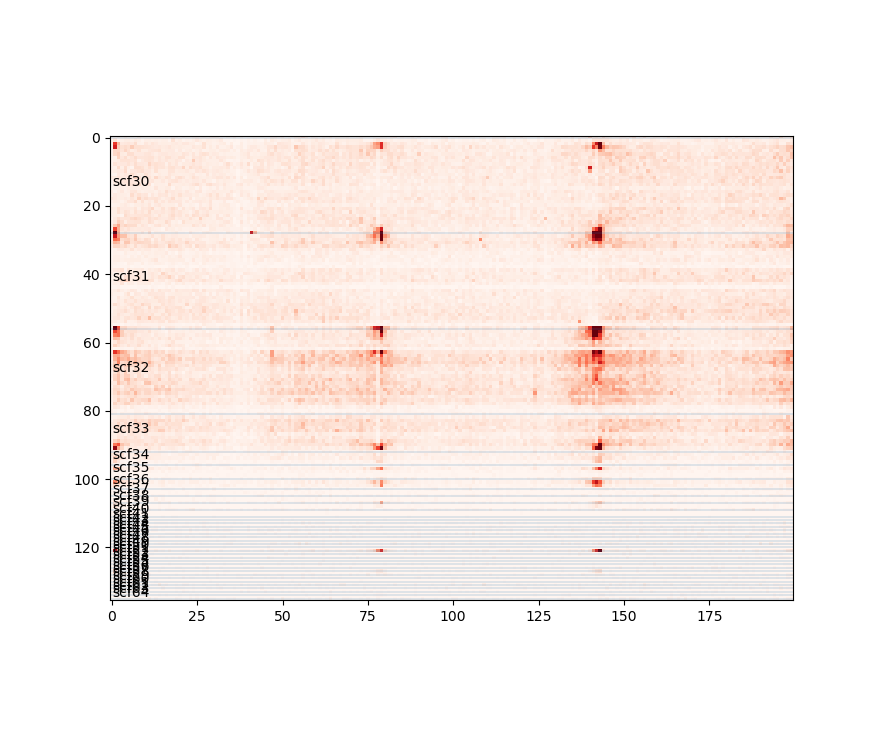

In [90]:
%matplotlib notebook
FIRST_SCF, LAST_SCF = 29, 65
starts = [clr.extent(chrom)[0] for chrom in clr.chroms()[FIRST_SCF:LAST_SCF]['name']]
text = clr.chroms()[FIRST_SCF:LAST_SCF]['name'].values
s, e = clr.extent(text[0])[0], clr.extent(text[-1])[1]
fullmat = clr.matrix(balance=False, sparse=False)[:][s:e, :200]
plt.imshow(fullmat, cmap='Reds', vmax=100)
for i, pos in enumerate(starts):
    plt.axhline(pos-s, lw=0.2)
    if i < (len(starts)-1):
        plt.text(0, ((pos + starts[i+1]) / 2)-s, 'scf'+ text[i].split('_')[1])

## Conclusion

Both strains probably have 35 or 36 chromosomes. There are a few very small scaffold (like `scaffold_36` in Neff) which have telomere-enriched contacts, however it's hard to know whether these are actual chromosomes or unplaced telomeric pieces of a larger scaffold.

Given the high ploidy of A. castellanii, they could also be divergent alternative haplotypes assembled separately.

In [114]:
# Largest and smallest chromosome
print(
    f"Neff: Largest={clr.chroms()['length'][0].values[0]/1000:.2f}kbp, "
    f"Smallest={clr.chroms()['length'][34].values[0]/1000:.2f}kbp"
)

Neff: Largest=2508.30kbp, Smallest=103.47kbp
